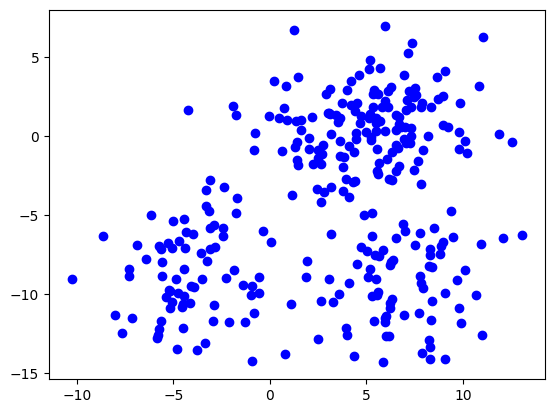

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

# Tạo 300 điểm dữ liệu với 4 phân cụm
x, _ = make_blobs(n_samples=300, centers=4, cluster_std=2.5, random_state=99)
x1 = x[:, 0]
x2 = x[:, 1]

# Vẽ biểu đồ với 4 phân cụm
plt.scatter(x1, x2, c='blue')

In [10]:
import numpy as np

def kmeans(dataSet, k, iterations=100):
    # Initialize centroids randomly
    # numSamples, numFeatures = dataSet.shape
    centroids = getRandomCentroids(dataSet, k)
    
    # Initialize variables
    oldCentroids = None
    
    # Run the main k-means algorithm
    while not shouldStop(oldCentroids, centroids, iterations):
        # Save old centroids for convergence test
        oldCentroids = centroids.copy()
        
        # Assign data points to centroids
        labels = getLabels(dataSet, centroids)
        
        # Produce new centroids
        centroids = getCentroids(dataSet, labels, k)
        
        # Check for convergence
        if np.allclose(oldCentroids, centroids):
            break
    
    # We can get the labels too by calling getLabels(dataSet, centroids)
    return centroids

def getRandomCentroids(dataSet, k):
    numSamples, numFeatures = dataSet.shape
    centroids = dataSet[np.random.choice(numSamples, k, replace=False)]
    return centroids

def shouldStop(oldCentroids, centroids, iterations):
    if iterations >= 0:
        return False
    return np.array_equal(oldCentroids, centroids)

def getLabels(dataSet, centroids):
    numSamples = dataSet.shape[0]
    labels = np.zeros(numSamples)
    for i in range(numSamples):
        distances = np.linalg.norm(dataSet[i] - centroids, axis=1)
        labels[i] = np.argmin(distances)
    return labels

def getCentroids(dataSet, labels, k):
    numFeatures = dataSet.shape[1]
    centroids = np.zeros((k, numFeatures))
    for i in range(k):
        centroids[i] = np.mean(dataSet[labels == i], axis=0)
    return centroids

In [11]:
# Chạy thuật toán với dữ liệu x và 4 phân cụm
centroids = kmeans(x, 4)
centroids

array([[-4.02556991, -8.95433045],
       [ 1.9578523 , -0.28847217],
       [ 6.78885677, -9.29017527],
       [ 6.86661798,  1.21637295]])

In [13]:
def calculateDistanceDeviation(dataSet, centroids, labels):
    numClusters = centroids.shape[0]
    distances = []
    for i in range(numClusters):
        cluster_points = dataSet[labels == i]
        centroid = centroids[i]
        cluster_distance = np.linalg.norm(cluster_points - centroid, axis=1)
        distances.extend(cluster_distance)
    return np.mean(distances)

calculateDistanceDeviation(x, centroids, getLabels(x, centroids))

2.822527480123275

In [14]:
def calculate_average_distance(dataSet, centroids, labels):
    total_distance = 0
    num_samples = dataSet.shape[0]
    for i in range(len(centroids)):
        cluster_points = dataSet[labels == i]
        cluster_distance = np.linalg.norm(cluster_points - centroids[i], axis=1)
        total_distance += np.sum(cluster_distance)
    return total_distance / num_samples

# Sử dụng hàm calculate_average_distance để tính độ lệch khoảng cách trung bình giữa các cụm
average_distance = calculate_average_distance(x, centroids, getLabels(x, centroids))
print("Độ lệch khoảng cách trung bình giữa các cụm:", average_distance)

Độ lệch khoảng cách trung bình giữa các cụm: 2.8225274801232745


In [15]:
# Chạy hàm tính phân cụm và tính độ lệch khoảng cách trung bình giữa các cụm
num_runs = 3
for i in range(num_runs):
    centroids = kmeans(x, 4)
    labels = getLabels(x, centroids)
    average_distance = calculate_average_distance(x, centroids, labels)
    print("Lần thứ", i+1, ":", average_distance)

Lần thứ 1 : 2.97302976009502
Lần thứ 2 : 2.822437256227225
Lần thứ 3 : 3.039453375417143


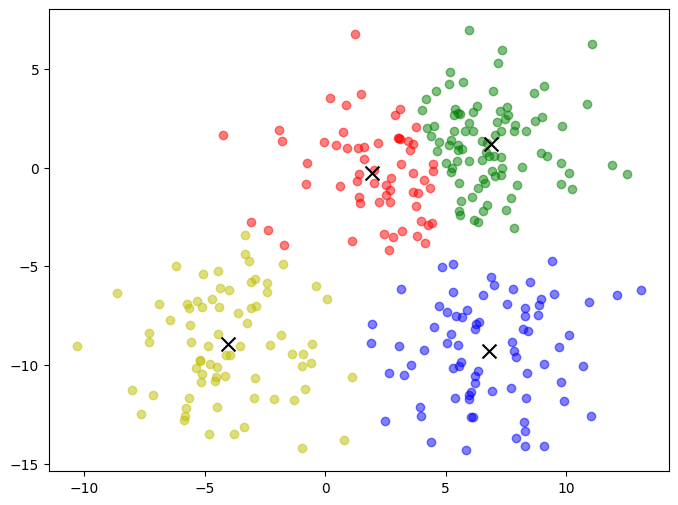

In [16]:
# Biến lưu trữ thông tin về lần phân cụm tốt nhất
best_labels = None
best_centroids = None
best_average_distance = float('inf')

# Chạy hàm tính phân cụm và tính độ lệch khoảng cách trung bình giữa các cụm
for i in range(3):
    centroids = kmeans(x, 4)
    labels = getLabels(x, centroids)
    average_distance = calculate_average_distance(x, centroids, labels)
    if average_distance < best_average_distance:
        best_labels = labels
        best_centroids = centroids
        best_average_distance = average_distance
        
# Vẽ biểu đồ dữ liệu và các centroid
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'y']
for i in range(len(x)):
    plt.scatter(x[i][0], x[i][1], color=colors[int(best_labels[i])], alpha=0.5)

for i in range(len(best_centroids)):
    plt.scatter(best_centroids[i][0], best_centroids[i][1], marker='x', color='black', s=100)
plt.show()

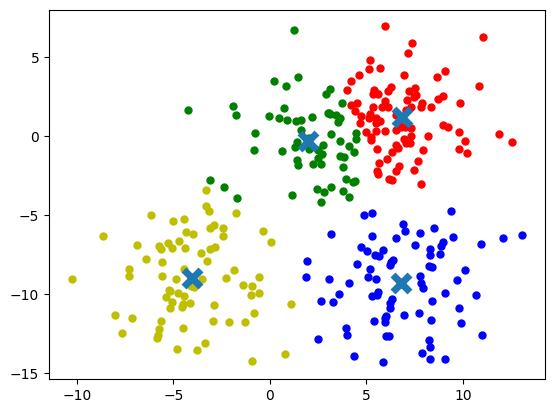

Điểm dữ liệu mới thuộc cụm: 0.0


In [17]:
# Vẽ biểu đồ dữ liệu và các centroid của cụm tốt nhất
colors = ["g.", "r.", "b.", "y."]
for i in range(len(x)):
    plt.plot(x[i][0], x[i][1], colors[int(best_labels[i])], markersize=10)

plt.scatter(best_centroids[:, 0], best_centroids[:, 1], marker="x", s=150, linewidths=5, zorder=10)
plt.show()

# Tạo điểm dữ liệu mới
new_point = np.array([[2, 6]])

# Xác định cụm mà điểm dữ liệu mới thuộc về
new_label = getLabels(new_point, best_centroids)[0]
print("Điểm dữ liệu mới thuộc cụm:", new_label)

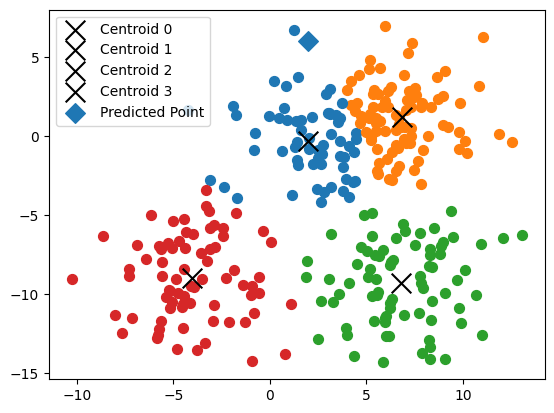

In [18]:
# Tính toán và vẽ các điểm dữ liệu, centroid và điểm dự đoán
new_point = np.array([2, 6])  # Điểm dữ liệu mới

# Vẽ các điểm dữ liệu với màu tùy theo cụm của chúng
for i in range(len(x)):
    plt.scatter(x[i][0], x[i][1], c='C'+str(int(best_labels[i])), s=50)

# Vẽ centroid của từng cụm
for i, centroid in enumerate(best_centroids):
    plt.scatter(centroid[0], centroid[1], marker='x', c='black', s=200, label=f'Centroid {i}')

# Vẽ điểm dự đoán
predicted_cluster = int(getLabels(np.array([new_point]), best_centroids)[0])
plt.scatter(new_point[0], new_point[1], marker='D', c='C'+str(predicted_cluster), s=100, label='Predicted Point')
plt.legend()
plt.show()